In [2]:
pip install -U scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894074 sha256=a1b1e7d12a863e67d20d9c166cb841a157308a6d74492a34260390aa18c8f212
  Stored in directory: c:\users\geeta\appdata\local\pip\cache\wheels\d5\74\fc\38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [45]:
temperature = ctrl.Antecedent(np.arange(0,51,10), 'temperature')
grade_of_water = ctrl.Antecedent(np.arange(0,101,10),"grade_of_water")
amt_of_purifier = ctrl.Consequent(np.arange(0,101,10),"amt_of_purifier")

In [46]:
temperature['low'] = fuzz.trimf(temperature.universe, [0,0,20])
temperature['medium'] = fuzz.trimf(temperature.universe, [0,20,50])
temperature['high'] = fuzz.trimf(temperature.universe, [20,50,50])

C:\Users\Geeta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


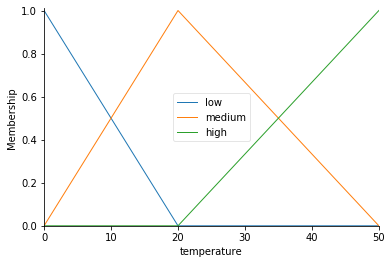

In [47]:
temperature.view()

In [48]:
grade_of_water['low'] = fuzz.trimf(grade_of_water.universe, [0,0,50])
grade_of_water['medium'] = fuzz.trimf(grade_of_water.universe, [0,50,100])
grade_of_water['high'] = fuzz.trimf(grade_of_water.universe, [50,100,100])

C:\Users\Geeta\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


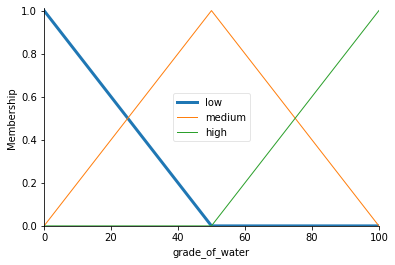

In [49]:
grade_of_water['low'].view()

In [50]:
amt_of_purifier['small'] = fuzz.trimf(amt_of_purifier.universe, [0,0,50])
amt_of_purifier['medium'] = fuzz.trimf(amt_of_purifier.universe, [0,50,100])
amt_of_purifier['large'] = fuzz.trimf(amt_of_purifier.universe, [50,100,100])

C:\Users\Geeta\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


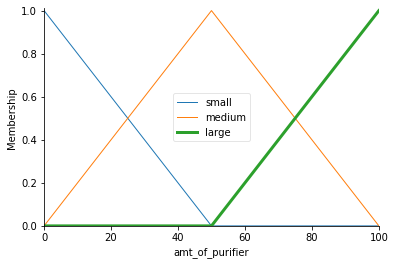

In [51]:
amt_of_purifier["large"].view()

C:\Users\Geeta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Geeta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c519e1e508>)

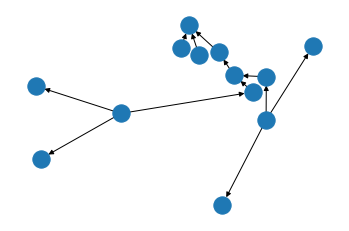

In [52]:
rule1 = ctrl.Rule(temperature['low'] & grade_of_water['low'],amt_of_purifier["large"])
rule1.view()

In [53]:
rule2 = ctrl.Rule(temperature['medium'] & grade_of_water['medium'],amt_of_purifier["medium"])

In [54]:
rule3 = ctrl.Rule(temperature['high'] & grade_of_water['high'],amt_of_purifier["small"])
rule4 = ctrl.Rule(temperature['low'] & grade_of_water['medium'],amt_of_purifier["large"])
rule5 = ctrl.Rule(temperature['medium'] & grade_of_water['low'],amt_of_purifier["large"])
rule6 = ctrl.Rule(temperature['high'] & grade_of_water['low'],amt_of_purifier["medium"])
rule7 = ctrl.Rule(temperature['high'] & grade_of_water['medium'],amt_of_purifier["small"])
rule8 = ctrl.Rule(temperature['low'] & grade_of_water['high'],amt_of_purifier["medium"])
rule9 = ctrl.Rule(temperature['medium'] & grade_of_water['high'],amt_of_purifier["small"])

In [55]:
final_amt_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
final_amt = ctrl.ControlSystemSimulation(final_amt_ctrl)

In [56]:
final_amt.input['temperature'] = 8.0
final_amt.input['grade_of_water'] = 20.0
final_amt.compute()

In [57]:
print(final_amt.output['amt_of_purifier'])

58.78048780487805


C:\Users\Geeta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


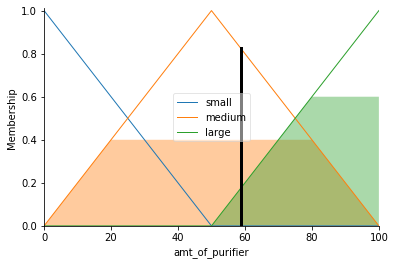

In [58]:
amt_of_purifier.view(sim = final_amt)